
## **Customer Review Analysis For Women's clothing E-Commerce**


### **Business Context**

One of the leading women's clothing e-commerce companies aims to analyze customer behavior by delving into customer demographics and reviews submitted on their website.

### **Business Objectives**

The primary objectives are outlined as follows:

##### **a. Exploratory Data Analysis (EDA)**

Perform exploratory analysis on the data to comprehend underlying patterns.

##### **b. Text Mining for Sentiment Analysis**

Perform text mining tasks to identify the most frequent words used in positive and negative sentiments. Create word clouds separately for positive and negative reviews.

##### **c. Sentiment Analysis Across Categories**

Understand sentiment among customers across different categories, sub-categories, products, considering factors like location and age group.

##### **d. Predictive Analytics for Recommender Systems**

Perform predictive analytics to understand the drivers of customers who recommend the products.

##### **e. Topic Mining for Theme Identification**

Create topics and understand the underlying themes by performing topic mining on the customer reviews.


### **Available Data:** 
Data has been provided for 23000+ Customer's Reviews and Ratings with 11 columns. The below 
table provides the description of each variable.

- **Product ID**  -   Clothing ID
- **Category**  -  Product Category
- **Subcategory1** -  Product Subcategory Level1
- **SubCategory2** -   Product Subcategory Level2
- **Location**  -  Customer Location
- **Customer**  -  Age Customer Age
- **Channel** -   Channel Used (Web or Mobile)
- **Review Title**  -  Review Title
- **Review Text** -   Review Description
- **Rating**  -  Review Rating
- **Recommend**  -  Flag Customer willing to recommend product or no

_____________________________________________

Import libraries and packages

In [23]:
import pandas as pd 
import numpy as np 
import string
import torch
import re
import huggingface_hub
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud
## nltk 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

from contractions import contractions_dict
from collections import Counter
from autocorrect import Speller

plt.style.use('ggplot')

Function to display initial findings about the data 

In [4]:
# data detais 
def get_details(df):

    print(f"Number of samples : {df.shape[0]} \nNumber of Features : {df.shape[1]}")
    print('='*50)
    print('='*50)
    print("Brief Information about dataframe :")
    print(df.info())
    print('='*50)
    print('='*50)
    print("Missing values is in each features :")
    print(df.isna().sum().sort_values(ascending=False))
    print('='*50)
    print('='*50)
    print(df.describe().T.drop('count', axis=1))
    print('='*50)
    print('='*50)
    

    

Read the data 

In [2]:
df = pd.read_excel("Womens Clothing Reviews Data.xlsx")
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
get_details(df)

Number of samples : 23486 
Number of Features : 11
Brief Information about dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB
None
Missing values is in each features :
Review Title      3810
Review Text        845
Category            14
Subcategory1        14
SubCategory2        14
Product ID           0
Lo

In [3]:
# clean the feature names for consistency 
df.columns= df.columns.str.replace(' ', '_')
# convert to lowercase 
df.columns = df.columns.str.lower()

In [5]:
# convert to string 
df['review_text'] = df['review_text'].astype(str)

### **Exploratory Data Analysis**

**Number of Unique Products**

In [9]:
# unique products sold 
no_of_unique_products = df['product_id'].nunique()
print('Number of Unique Products :\n', no_of_unique_products )


Number of Unique Products :
 1206


**Distribution of Product_ID to understand product popularity (top 30 products)**

C:\Users\aksha\AppData\Local\Temp\ipykernel_12180\3756582584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'product_id',


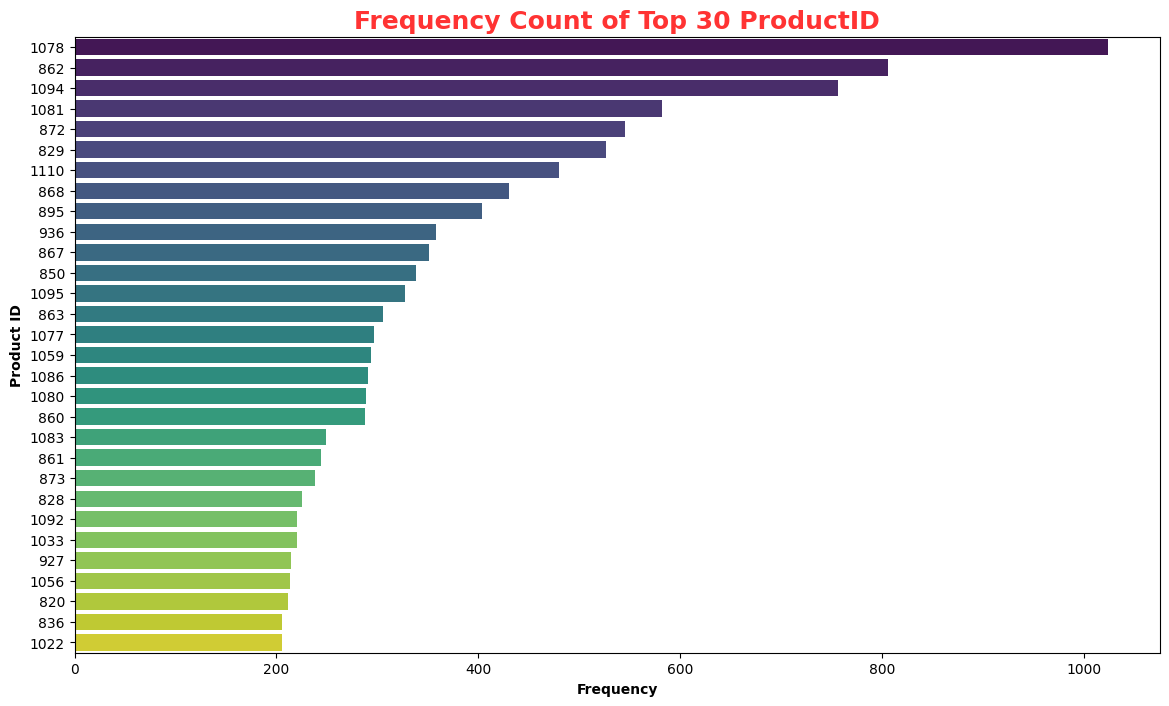

In [10]:
# top 30 purchased products
top_30_ProductID = df['product_id'].value_counts()[:30].index

# plot count plot
plt.figure(figsize=(14,8))
sns.countplot(y = 'product_id', 
              data= df[df['product_id'].isin(top_30_ProductID)],
              order = top_30_ProductID,
              palette='viridis',
              legend=False
              )
plt.title("Frequency Count of Top 30 ProductID", weight='bold', color='#ff3333', fontsize=18)
plt.xlabel("Frequency", weight='bold')
plt.ylabel('Product ID', weight='bold')
plt.show()

**Frequency Distribution of Product Category**

In [11]:
# proportion of product categories in our data 
df['category'].value_counts().reset_index()

,category,count
0,General,13850
1,General Petite,8120
2,Initmates,1502


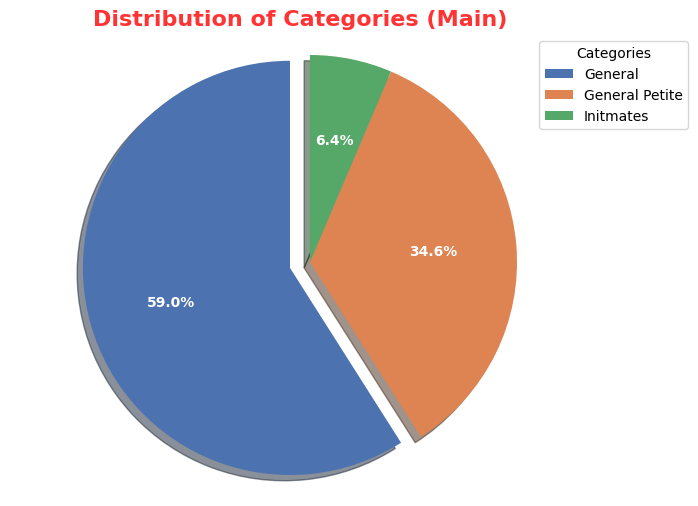

In [12]:
# Calculate the counts for each category
category_counts = df['category'].value_counts()

# Use a darker color palette
colors = sns.color_palette('deep')

# Plot the pie chart with styling and category names inside
plt.figure(figsize=(6,6))
explode = (0.1, 0, 0)  # Highlight the first category
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'color': 'white', 'weight': 'bold'})
plt.title('Distribution of Categories (Main)', weight='bold', fontsize=16, color='#ff3333')

# Add legend
plt.legend(category_counts.index, title="Categories", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


We can notice that General Category has more than 50% of the sales.  while Intimates are the lowest. 

**Frequency Distribution of Subcategory 1** 

In [13]:
# normalised value counts
df['subcategory1'].value_counts(normalize=True).reset_index()

,subcategory1,proportion
0,Tops,0.445978
1,Dresses,0.269214
2,Bottoms,0.161852
3,Intimate,0.073918
4,Jackets,0.043967
5,Trend,0.005070


C:\Users\aksha\AppData\Local\Temp\ipykernel_12180\1922053706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='subcategory1' , data=df,


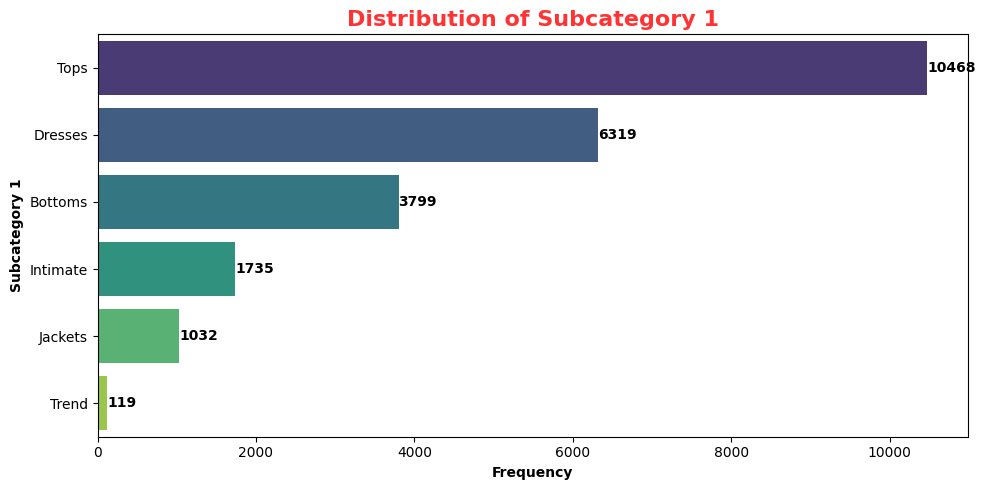

In [14]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='subcategory1' , data=df, 
                   order= df['subcategory1'].value_counts().index, 
                   palette='viridis')
plt.title('Distribution of Subcategory 1', weight='bold', fontsize=16, color='#ff3333')
ax.set_xlabel('Frequency', weight='bold')
ax.set_ylabel('Subcategory 1', weight='bold')

# Add text annotations
for i, v in enumerate(df['subcategory1'].value_counts()):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')
   
plt.tight_layout()
plt.show()

**Frequency Distribution of Subcategory 2** 

In [15]:
df['subcategory2'].value_counts(normalize=True).reset_index()

,subcategory2,proportion
0,Dresses,0.269214
1,Knits,0.206331
2,Blouses,0.131944
3,Sweaters,0.060838
4,Pants,0.059134
5,Jeans,0.048867
6,Fine gauge,0.046864
7,Skirts,0.040261
8,Jackets,0.029993
9,Lounge,0.029439


C:\Users\aksha\AppData\Local\Temp\ipykernel_12180\2361558313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='subcategory2' , data=df,


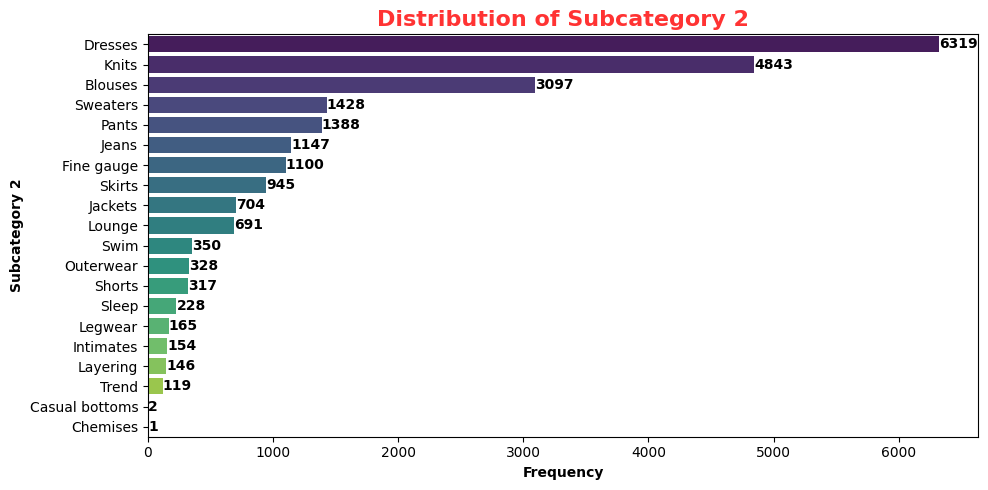

In [16]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='subcategory2' , data=df, 
                   order= df['subcategory2'].value_counts().index, 
                   palette='viridis')
plt.title('Distribution of Subcategory 2', weight='bold', fontsize=16, color='#ff3333')
ax.set_xlabel('Frequency', weight='bold')
ax.set_ylabel('Subcategory 2', weight='bold')

# Add text annotations
for i, v in enumerate(df['subcategory2'].value_counts()):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')
   
plt.tight_layout()
plt.show()

**Frequency Distribution of Orders by Location**

C:\Users\aksha\AppData\Local\Temp\ipykernel_12180\1904827176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='location' , data=df,


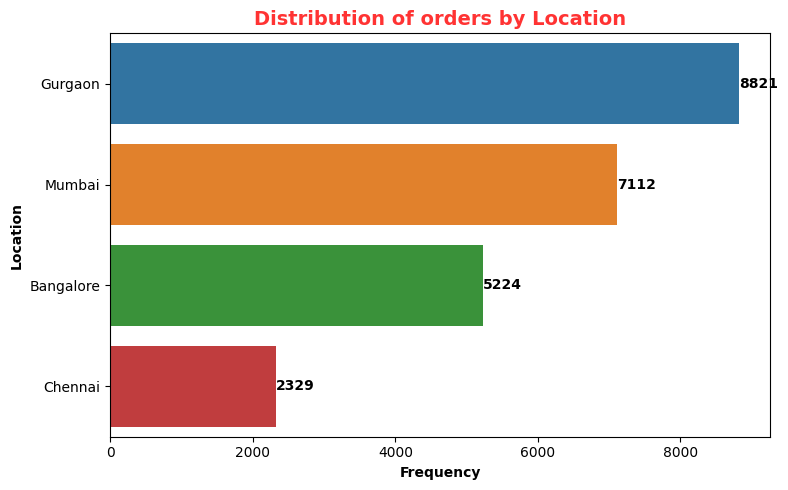

In [17]:
# Plot the horizontal bar chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(y='location' , data=df, 
                   order= df['location'].value_counts().index, 
                   palette='tab10')
plt.title('Distribution of orders by Location', weight='bold', fontsize=14, color='#ff3333')
ax.set_xlabel('Frequency', weight='bold')
ax.set_ylabel('Location', weight='bold')
# Add text annotations
for i, v in enumerate(df['location'].value_counts()):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')
   
plt.tight_layout()
plt.show()

**Orders by Channel** 

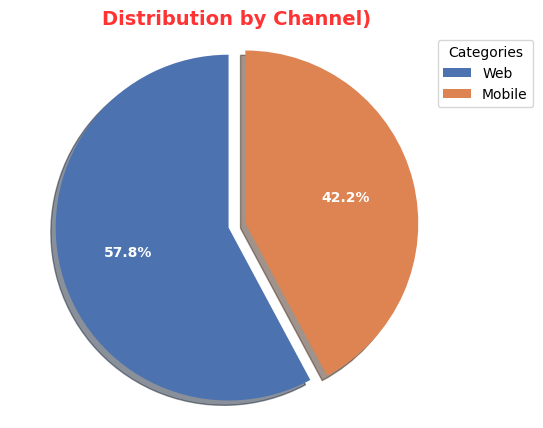

In [19]:
# Calculate the counts for each category
channel_counts = df['channel'].value_counts()

# Use a darker color palette
colors = sns.color_palette('deep')

# Plot the pie chart with styling and channel names inside
plt.figure(figsize=(5,5))
explode = (0.1, 0)  # Highlight the first channel
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'color': 'white', 'weight': 'bold'})
plt.title('Distribution by Channel)', weight='bold', fontsize=14, color='#ff3333')

# Add legend
plt.legend(channel_counts.index, title="Categories", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Analysis of Customer Age**

We will briefly analyse distribution of age.

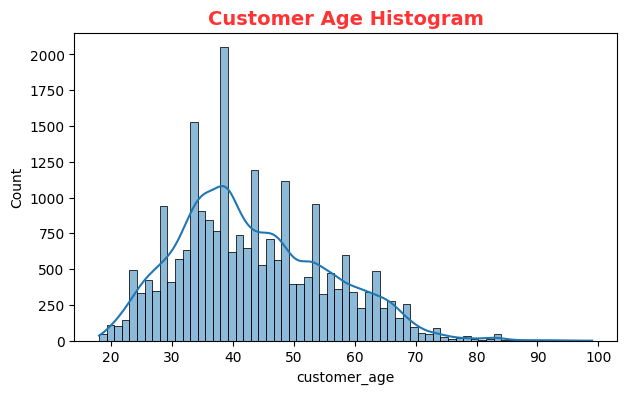

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(df['customer_age'], kde=True)
plt.title('Customer Age Histogram', weight='bold', fontsize=14, color='#ff3333')
plt.show()

**Frequency Distibution of User Ratings**

In [22]:
# proportioon of ratings in our data 
df['rating'].value_counts(normalize=True).reset_index()

,rating,proportion
0,5,0.559099
1,4,0.216171
2,3,0.122243
3,2,0.066635
4,1,0.035851


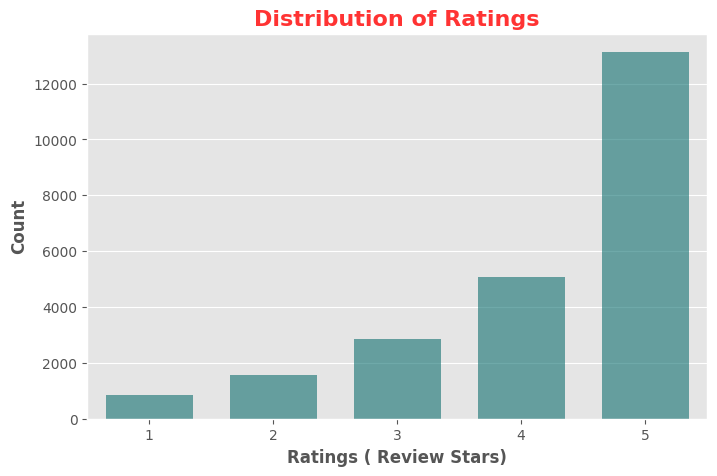

In [49]:
# plot frequency plots of ratings 
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, color='teal',alpha=0.6, width=0.7)
plt.title('Distribution of Ratings', weight='bold', fontsize=16, color='#ff3333')
plt.xlabel('Ratings ( Review Stars)', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

Most of the products sold in our data are highly rated. 

**Reccomendation Flag**
- 1 - Recommended
- 0 - Not recommended

In [24]:
df['recommend_flag'].value_counts(normalize=True)

recommend_flag
1    0.822362
0    0.177638
Name: proportion, dtype: float64

C:\Users\aksha\AppData\Local\Temp\ipykernel_12180\1420660045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recommend_flag', data=df, palette='viridis', width=0.5)


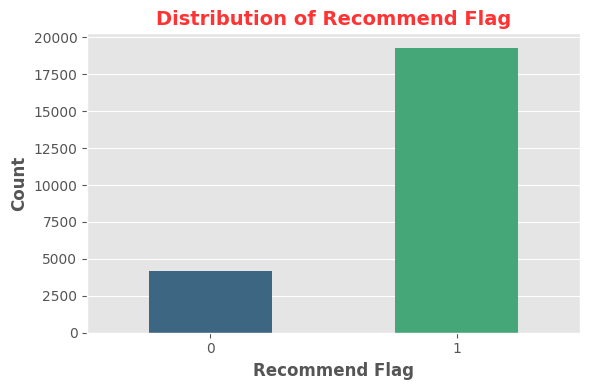

In [47]:
# plot 
plt.figure(figsize=(6, 4))
sns.countplot(x='recommend_flag', data=df, palette='viridis', width=0.5)
plt.title('Distribution of Recommend Flag', weight='bold', fontsize=14, color='#ff3333')
plt.xlabel('Recommend Flag', weight='bold')
plt.ylabel('Count', weight='bold')
plt.tight_layout()
plt.show()

**Frequency plots of Categorical variables with Recommend_Flag**

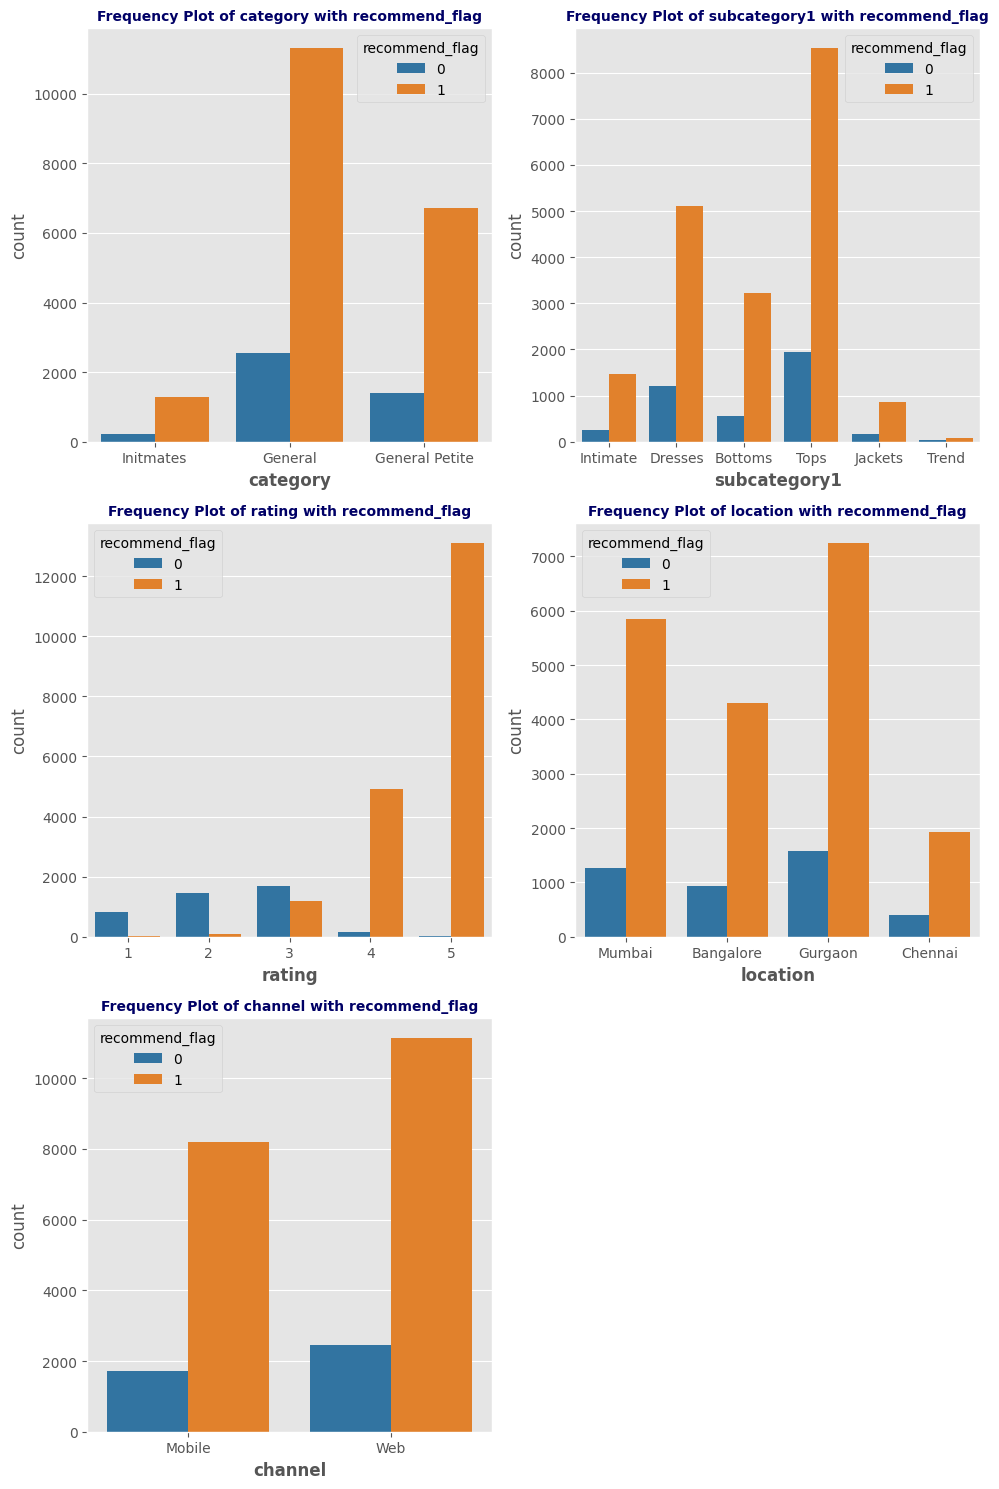

In [54]:
categories = ['category', 'subcategory1', 'rating', 'location', 'channel']
hue_variable = 'recommend_flag'

# Calculate the number of rows needed for subplots
num_rows = (len(categories) + 1) // 2

# Set up the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through the categories and create subplots
for i, category in enumerate(categories):
    ax = axes[i]

    # Create a countplot for the current category
    sns.countplot(x=category, hue=hue_variable, data=df, ax=ax, palette='tab10')
    ax.set_title(f'Frequency Plot of {category} with {hue_variable}', fontsize=10, color='#000066', weight='bold')
    ax.set_xlabel(f'{category}', weight='bold')
# Remove any empty subplots
for i in range(len(categories), 2 * num_rows):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
plt.show()

More than 80% of the times customers recommended the products that they reviewed. 

**Age distribution by `rating`, `Category`, `recommend_flag`, `subcategory1`**

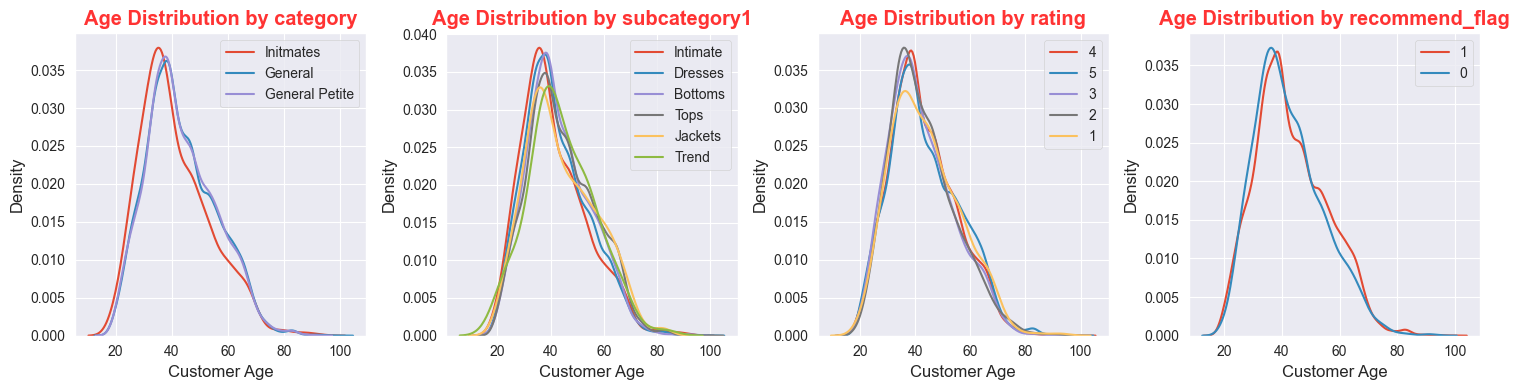

In [104]:
# Create subplots
fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1])

# Plot KDE for 'word_count' distribution in each category
categories = ['category', 'subcategory1', 'rating', 'recommend_flag']

for i, category in enumerate(categories, 1):
    ax = plt.subplot(gs[i - 1])
    for value in df[category].unique():
        sns.kdeplot(df[df[category] == value]['customer_age'], label=value, ax=ax)

    ax.set_title(f'Age Distribution by {category}', weight='bold', color='#ff3333')
    ax.set_xlabel('Customer Age')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

**Word count in a Customer Review Analysis**

In [66]:
# create a feature 'word_count' using review text
df['word_count'] = df['review_text'].str.strip().apply(len)

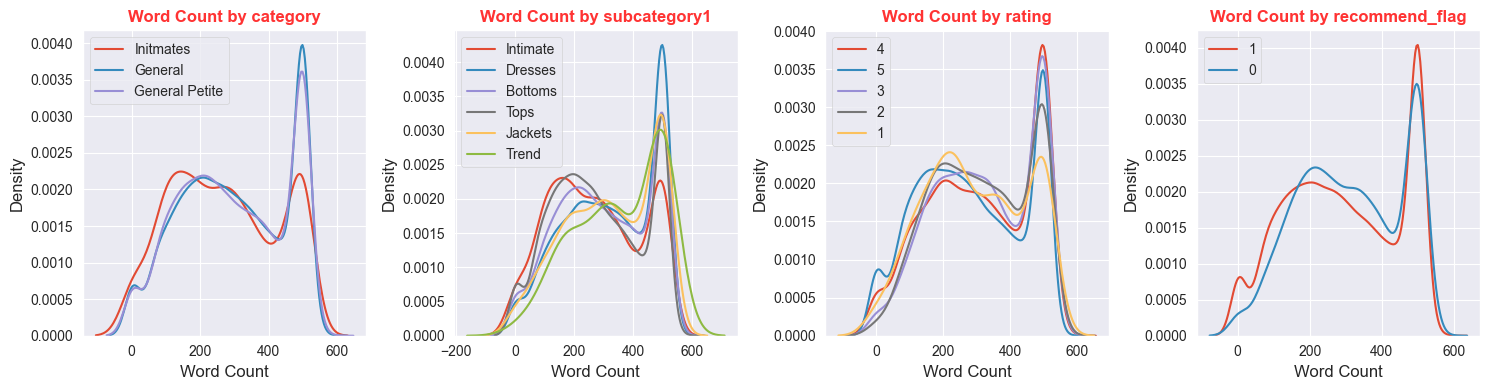

In [108]:
# Create subplots
fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1])

# Plot KDE for 'word_count' distribution in each category
categories = ['category', 'subcategory1', 'rating', 'recommend_flag']

for i, category in enumerate(categories, 1):
    ax = plt.subplot(gs[0, i - 1])
    for value in df[category].unique():
        sns.kdeplot(df[df[category] == value]['word_count'], label=value, ax=ax)

    ax.set_title(f'Word Count by {category}',fontsize=12, weight='bold',  color='#ff3333')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

We can notice a spike in 500 words range. 

**Analysing Subcategory1  by  Category**

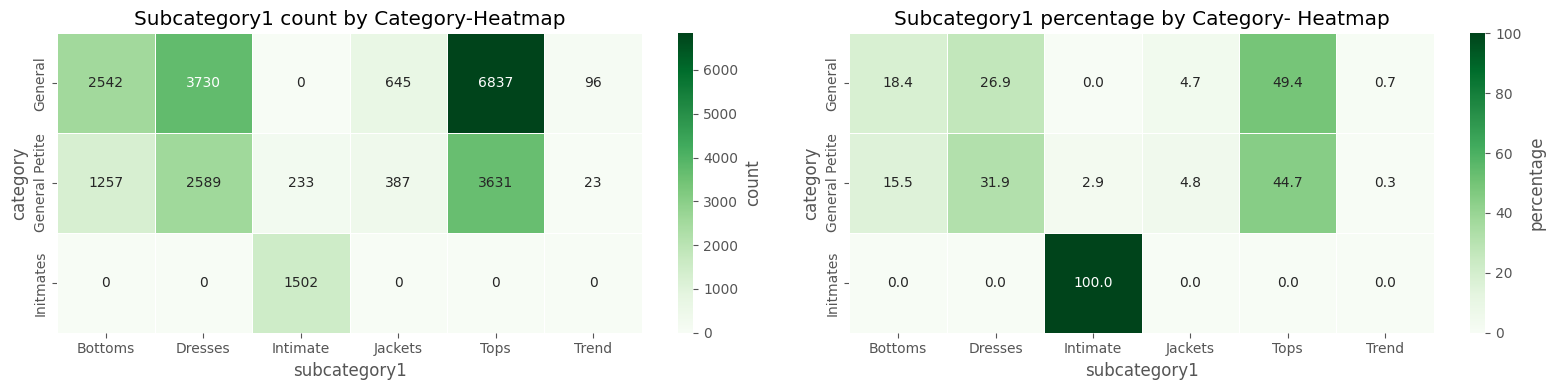

In [60]:
# Crosstabulation of Category and Subcategory1
cross_tab_count = pd.crosstab(df['category'], df['subcategory1'])

# Crosstabulation of category and subcategory1 with normalization
cross_tab_percent = pd.crosstab(df['category'], df['subcategory1'], normalize='index') * 100  # Normalize along the index (rows)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot count heatmap
sns.heatmap(cross_tab_count, annot=True,
            fmt='g', linewidths=0.5,
            cmap='Greens', cbar=True, 
            ax=axes[0], cbar_kws={'label':'count'})
axes[0].set_title('Subcategory1 count by Category-Heatmap')

# Plot percentage heatmap
sns.heatmap(cross_tab_percent, annot=True, 
            fmt='.1f', cmap='Greens', 
            linewidths=0.5,
            cbar=True, ax=axes[1], 
            cbar_kws={'label':'percentage'})
axes[1].set_title('Subcategory1 percentage by Category- Heatmap')

# Adjust layout
plt.tight_layout()
plt.show()

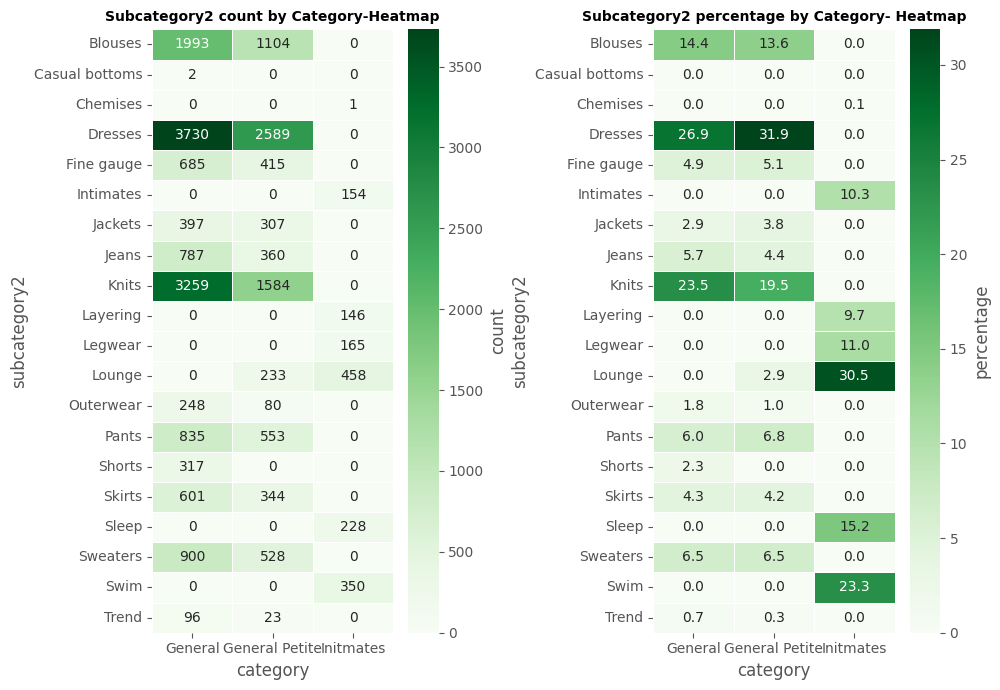

In [67]:
# Crosstabulation of Category and Subcategory1
cross_tab_count = pd.crosstab(df['category'], df['subcategory2']).T

# Crosstabulation of category and subcategory1 with normalization
cross_tab_percent = pd.crosstab(df['category'], df['subcategory2'], normalize='index').T * 100  # Normalize along the index (rows)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot count heatmap
sns.heatmap(cross_tab_count, annot=True,
            fmt='g', linewidths=0.5,
            cmap='Greens', cbar=True, 
            ax=axes[0], cbar_kws={'label':'count'})
axes[0].set_title('Subcategory2 count by Category-Heatmap', weight='bold', fontsize=10)

# Plot percentage heatmap
sns.heatmap(cross_tab_percent, annot=True, 
            fmt='.1f', cmap='Greens', 
            linewidths=0.5,
            cbar=True, ax=axes[1], 
            cbar_kws={'label':'percentage'})
axes[1].set_title('Subcategory2 percentage by Category- Heatmap', weight='bold', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

**Analysing Subcategory2 by Subcategory1**

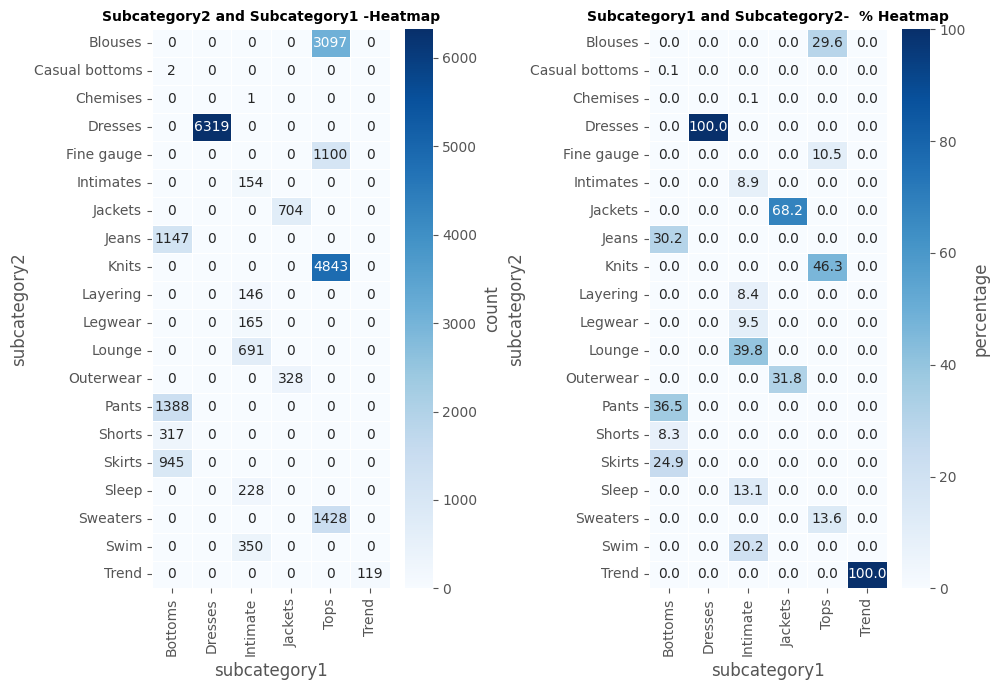

In [65]:
# Crosstabulation of  Subcategory1 and Subcategory2
cross_tab_count = pd.crosstab(df['subcategory1'], df['subcategory2']).T

# Crosstabulation of subcategory1 and Subcategory2 with normalization
cross_tab_percent = pd.crosstab(df['subcategory1'], df['subcategory2'], normalize='index').T * 100  # Normalize along the index (rows)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot count heatmap
sns.heatmap(cross_tab_count, annot=True,
            fmt='g', linewidths=0.5,
            cmap='Blues', cbar=True, 
            ax=axes[0], cbar_kws={'label':'count'})
axes[0].set_title('Subcategory2 and Subcategory1 -Heatmap', weight='bold', fontsize=10)

# Plot percentage heatmap
sns.heatmap(cross_tab_percent, annot=True, 
            fmt='.1f', cmap='Blues', 
            linewidths=0.5,
            cbar=True, ax=axes[1], 
            cbar_kws={'label':'percentage'})
axes[1].set_title('Subcategory1 and Subcategory2-  % Heatmap', weight='bold', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

### **Sentiment Analysis using Customer Reviews**

**Text pre-processing using NLTK**

In [17]:
# function to expand contractions 
def expand_contractions(text, contractions_dict):
    return ' '.join(contractions_dict.get(word, word) for word in text.split())

In [9]:
# Create a lemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text_nltk(text):
    # Convert text to lowercase
    text = text.lower()

    # Expand contractions
    text = expand_contractions(text, contractions_dict)
    
    # Remove non-alpha characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove single letters
    tokens = [token for token in tokens if len(token) > 1]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Rejoin the tokens to a string
    clean_text = ' '.join(tokens)
    
    return clean_text

In [15]:
def preprocess_minimal(text):
    # Convert text to lowercase
    text = text.lower()

    # Expand contractions
    text = expand_contractions(text, contractions_dict)
    
    # Remove non-alpha characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove single letters
    tokens = [token for token in tokens if len(token) > 1]
    
    # Rejoin the tokens to a string
    clean_text = ' '.join(tokens)
    
    return clean_text

In [10]:
# keep a copy of data 
df1 = df.copy()

In [11]:
df1.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,review_title,review_text,rating,recommend_flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [12]:
# remove review title columns 
df1.pop('review_title')[:1]

0    NaN
Name: review_title, dtype: object

In [13]:
df1.dropna(inplace=True)

In [14]:
df1['review_text'] = df1['review_text'].astype(str)

In [19]:
df1['clean_text_1'] = df1['review_text'].apply(preprocess_text_nltk)

In [18]:
df1['min_clean_text'] = df1['review_text'].apply(preprocess_minimal)

##### **Text mining  to visualise most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews**

##### **Heuristic Approach**

- Recommend_Flag == 1 -----> `Postive` sentiment
- Recommend_Flag == 0 -----> `Negative` sentiment

In [21]:
df1['sentiment_heuristic'] = df1['recommend_flag'].map({1:'positive', 0:'negative'}) 

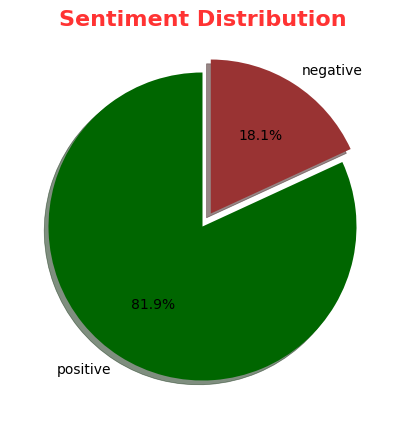

In [91]:
# Count the occurrences of each sentiment
sentiment_counts = df1['sentiment_heuristic'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', startangle=90,
        explode=[0, 0.1], shadow=True, 
        colors=['#006600', '#993333'])
plt.title('Sentiment Distribution', weight='bold', fontsize=16, color='#ff3333' )
plt.show()

#### **WordClouds**

Using a word cloud of adjectives can be a visually appealing and intuitive way to gain insights into user sentiment and key preferences, especially when analyzing text data related to product reviews, feedback.
- **Focus on Descriptive Elements**: Adjectives often carry sentiment and convey specific characteristics or opinions about products or services. Analyzing adjectives can highlight the positive and negative sentiments expressed by users.
- **Identifying Key Preferences**: Adjectives used by users can reveal their preferences and priorities. For example, in product reviews, adjectives like "durable," "stylish," or "affordable" can indicate specific features that users value.
- **Insights into User Experience**: Adjectives can provide insights into the user experience. Positive adjectives might indicate satisfaction, while negative adjectives could point to areas for improvement.

In [49]:
def extract_adj(corpus):
    # Remove non-alphabetic characters and tokenize
    tokens = word_tokenize(re.sub(r'[^a-zA-Z\s]', '', corpus))
    
    # Part-of-speech tagging
    pos_tags = pos_tag(tokens)
    # custom stopwords based on domain 
    stopwords = ['top', 'dress']
    # Extract adjectives
    adjectives = [word for word, pos in pos_tags if pos.startswith('JJ') and word not in stopwords]
    
    # Join adjectives into a string
    adjective_str = ' '.join(adjectives)
    
    return adjective_str

In [50]:
# Assuming you have a 'cleaned_text' column containing preprocessed text
positive_texts = df1[df1['sentiment_heuristic'] == 'positive']['min_clean_text']
negative_texts = df1[df1['sentiment_heuristic'] == 'negative']['min_clean_text']

# Concatenate all positive and negative texts into single strings
positive_corpus = ' '.join(positive_texts)
negative_corpus = ' '.join(negative_texts)

# extract adjectives 
positive_adjectives = extract_adj(positive_corpus)
negative_adjectives = extract_adj(negative_corpus)

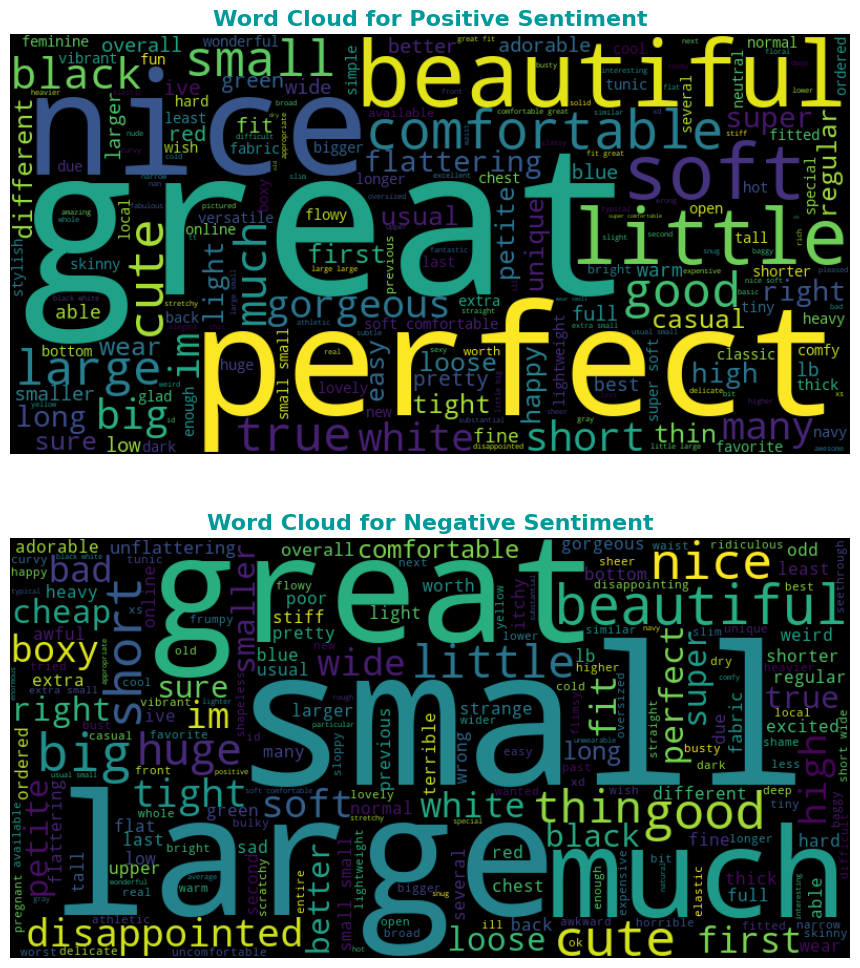

In [51]:
# Create WordCloud for Positive Sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_adjectives)

# Create WordCloud for Negative Sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_adjectives)

# Plot WordClouds
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment', weight='bold', color= '#009999', fontsize=16)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment',  weight='bold', color= '#009999', fontsize=16 )
plt.axis('off')

plt.show()

#### **Hugging-face pre-trained model for Sentiment Analysis**

In [67]:
from transformers import pipeline
# creeate a transformer pipeline for sentiment analysis with pretrained model 
sentiment_pipeline = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment", device=0) # device=0 --> utlising GPU! 

# Assuming 'min_clean_text' is a column in your DataFrame
def analyze_sentiment(text):
    rating = sentiment_pipeline(text)[0]['label']
    if rating in ['1 star', '2 stars']:
        sentiment = 'Negative'
    elif rating == '3 stars':
        sentiment = 'Neutral'
    else:
        sentiment = 'Positive'
    
    return sentiment 

df1['sentiment_pt'] = df1['min_clean_text'].apply(analyze_sentiment)

d:\ML Projects\Customer Review Analysis\nlpenv\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [53]:
df1 = pd.read_csv('customer_review_final.csv')
df1.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,review_text,rating,recommend_flag,clean_text_1,min_clean_text,sentiment_pt
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable,absolutely wonderful silky and sexy and comfor...,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store im ...,love this dress it is sooo pretty happened to ...,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,high hope dress really wanted work initially o...,had such high hopes for this dress and really ...,Neutral
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...,love love love this jumpsuit it is fun flirty ...,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...,this shirt is very flattering to all due to th...,Positive


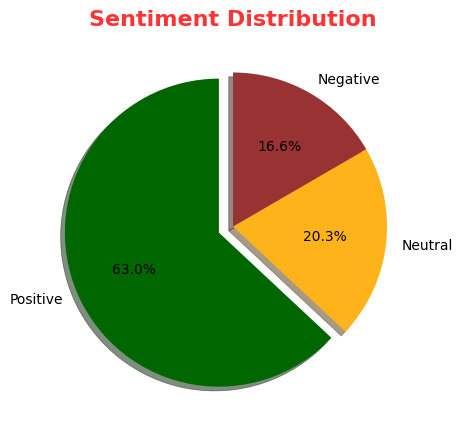

In [71]:
# Count the occurrences of each sentiment
sentiment_counts = df1['sentiment_pt'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', startangle=90,
        shadow=True, explode=[0.1, 0, 0], 
        colors=['#006600','#ffb31a','#993333'])
plt.title('Sentiment Distribution', weight='bold', fontsize=16, color='#ff3333' )
plt.show()

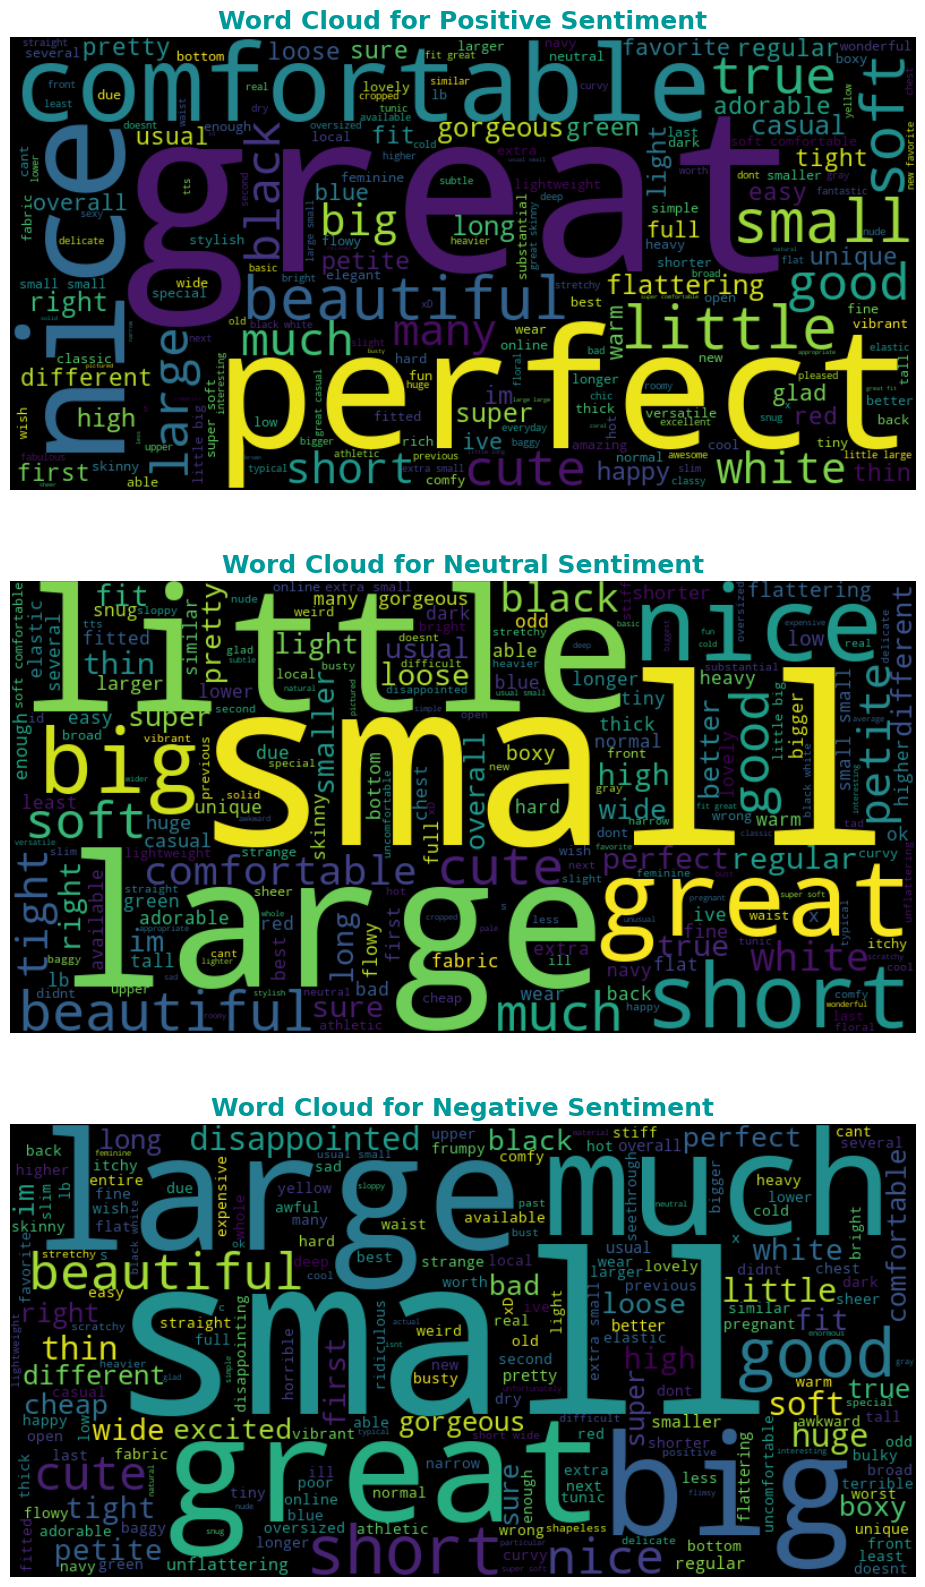

In [54]:
# Assuming you have a 'cleaned_text' column containing preprocessed text
positive_texts = df1[df1['sentiment_pt'] == 'Positive']['review_text']
neutral_texts = df1[df1['sentiment_pt'] == 'Neutral']['review_text']
negative_texts = df1[df1['sentiment_pt'] == 'Negative']['review_text']

# Concatenate all positive and negative texts into single strings
positive_corpus = ' '.join(positive_texts)
neutral_corpus = ' '.join(neutral_texts)
negative_corpus = ' '.join(negative_texts)

# extract adjectives 
positive_adjectives = extract_adj(positive_corpus)
neutral_adjectives = extract_adj(neutral_corpus)
negative_adjectives = extract_adj(negative_corpus)

# Create WordCloud for Positive Sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_adjectives)

# Create WordCloud for Positive Sentiment
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate(neutral_adjectives)

# Create WordCloud for Negative Sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_adjectives)


# Plot WordClouds
plt.figure(figsize=(30, 20))
# wordcloud for positvie reviews
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment', weight='bold', color= '#009999', fontsize=18)
plt.axis('off')

# wordcloud for neutral reviews
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment',  weight='bold', color= '#009999', fontsize=18)
plt.axis('off')

# word cloud for negative reviews
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment',  weight='bold', color= '#009999', fontsize=18)
plt.axis('off')

plt.show()



In [79]:
# save the dataframe for further predictive modelling 
df1.to_csv('customer_review_final.csv', index_label=False)

**Understand sentiment among the customers on the different categories, sub categories, products by location and age group**

In [100]:
# Define custom colors for sentiments
sentiment_colors = {'Positive': '#008060', 'Neutral': '#b38f00', 'Negative': '#800000'}
def plot_sentiment_distribution( category_column, df=df1 ,sentiment_column='sentiment_pt', palette=sentiment_colors):
    """
    Plot sentiment distribution based on a categorical column.

    Parameters:
    - df: DataFrame, the input DataFrame.
    - category_column: str, the categorical column for which sentiment distribution is plotted.
    - sentiment_column: str, the column representing sentiments (default is 'sentiment_pt').
    - palette: dict, custom colors for sentiments (default is sentiment_colors).

    Returns:
    - None
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(x=category_column, hue=sentiment_column, data=df, palette=palette, alpha=0.6)
    plt.title(f'Sentiment Distribution by {category_column.capitalize()}', weight='bold', color='#009999', fontsize=16)
    plt.xlabel(f'{category_column.capitalize()}', weight='bold')
    plt.ylabel('Count', weight='bold')
    plt.legend(title='Sentiments')
    plt.show()

In [84]:
# Convert 'customer_age' to categorical for better analysis
df1['age_group'] = pd.cut(df1['customer_age'], bins=[18, 30, 40, 55, 70, 100 ], labels=['18-30', '30-40', '40-55', '55-70', '70+'])

**Sentiment among Age-Group**

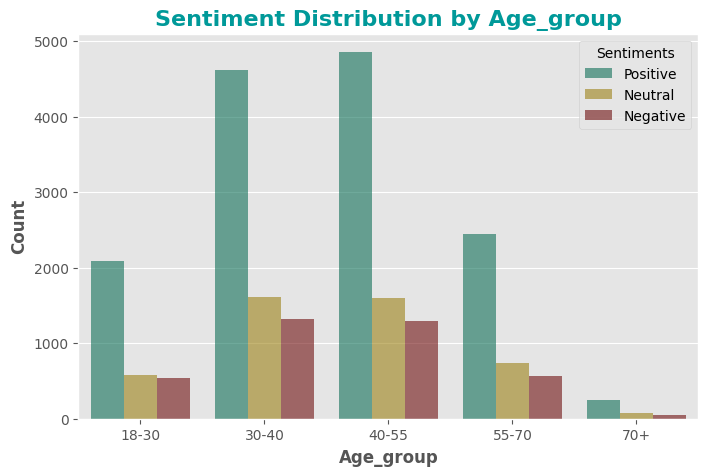

In [101]:
plot_sentiment_distribution(category_column='age_group')

we can notice that we have highest proportion of Positive reivew among age-group `40-55`

**Sentiment of Customers among Product Categories**

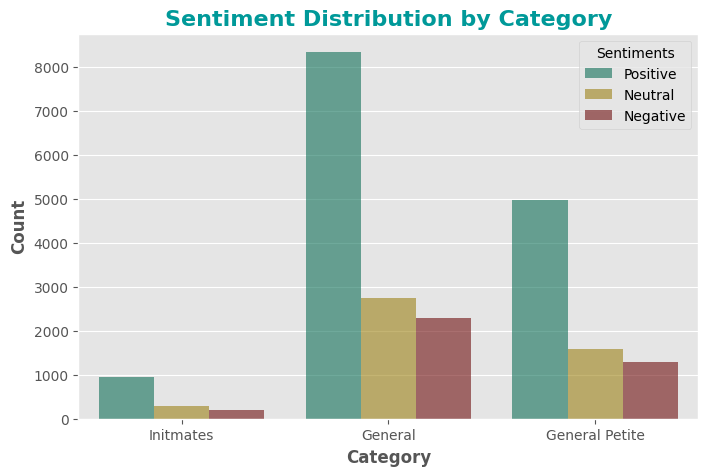

In [102]:
plot_sentiment_distribution(category_column='category')

**Sentiment of Customers among Product Subcategory**

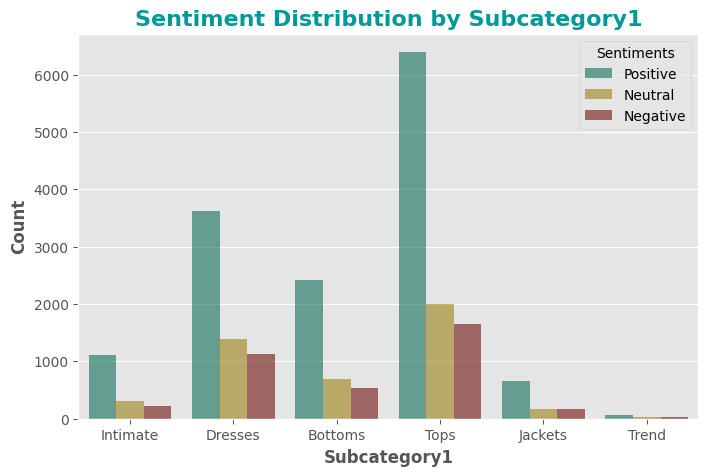

In [103]:
plot_sentiment_distribution(category_column='subcategory1')

**Sentiment of Customers by Location**

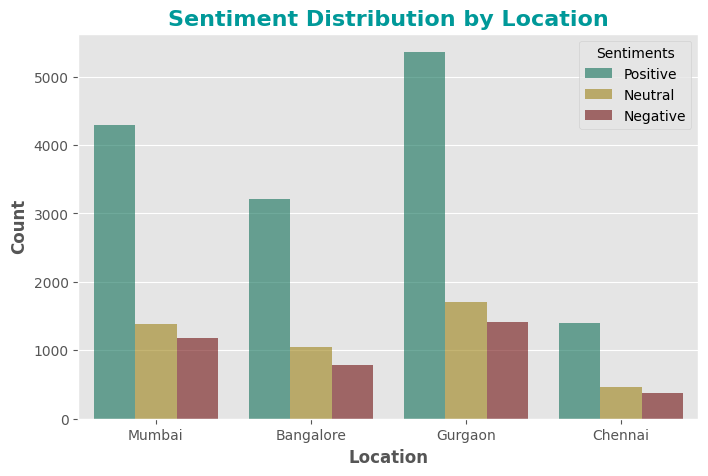

In [104]:
plot_sentiment_distribution(category_column='location')

**Sentiment of Customers by Channel**

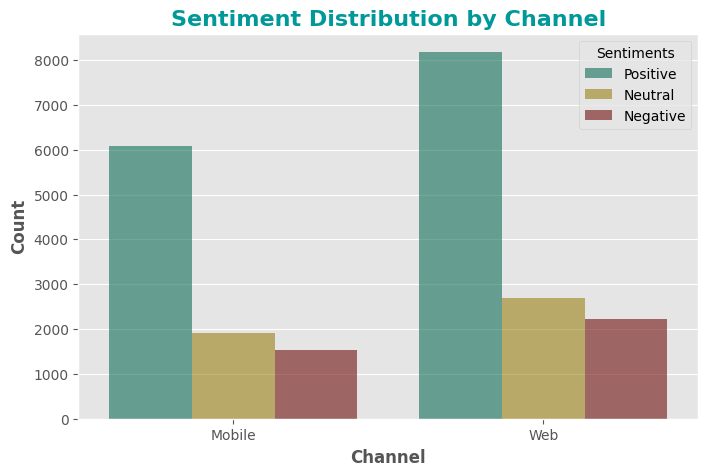

In [105]:
plot_sentiment_distribution(category_column='channel')

**Sentiment of Customers by Recommend_Flag**

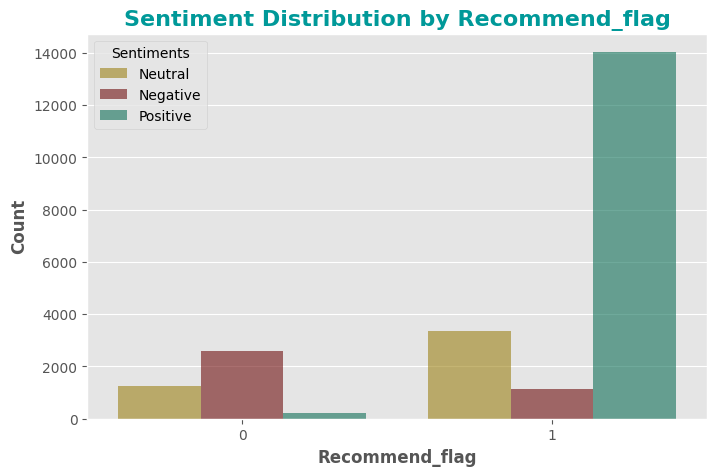

In [106]:
plot_sentiment_distribution(category_column='recommend_flag')

===================================**PART-1**==============================================

-----------------------------------